# Smart Sales Forecasting using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/content/drive/MyDrive/online_retail_II.csv')
print(df.shape)

(1048575, 8)


Data is too large, so we cleaned it up.

In [3]:
import pandas as pd



n = 60000  # Number of rows to delete from the bottom
df = df.iloc[:-n]  # Remove last n rows

df.to_csv("cleaned_dataset.csv", index=False)  # Save the new file if needed


In [4]:
df.shape

(988575, 8)

In [5]:
print(df.head())
print(df.columns)

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

        InvoiceDate  Price  Customer ID         Country  
0  01-12-2009 07:45   6.95      13085.0  United Kingdom  
1  01-12-2009 07:45   6.75      13085.0  United Kingdom  
2  01-12-2009 07:45   6.75      13085.0  United Kingdom  
3  01-12-2009 07:45   2.10      13085.0  United Kingdom  
4  01-12-2009 07:45   1.25      13085.0  United Kingdom  
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [6]:
# Drop missing values in 'Customer ID' and 'Description'
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Remove cancelled transactions (Invoices starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Remove rows where Quantity or Price is zero or negative
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [7]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 748444 entries, 0 to 988574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      748444 non-null  object 
 1   StockCode    748444 non-null  object 
 2   Description  748444 non-null  object 
 3   Quantity     748444 non-null  int64  
 4   InvoiceDate  748444 non-null  object 
 5   Price        748444 non-null  float64
 6   Customer ID  748444 non-null  float64
 7   Country      748444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 51.4+ MB
None
            Quantity          Price    Customer ID
count  748444.000000  748444.000000  748444.000000
mean       13.405636       3.234379   15333.139964
std       115.598841      30.065749    1694.571823
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13975.000000
50%         5.000000       1.950000   15276.000000
75%        12.000000       3.750000   16

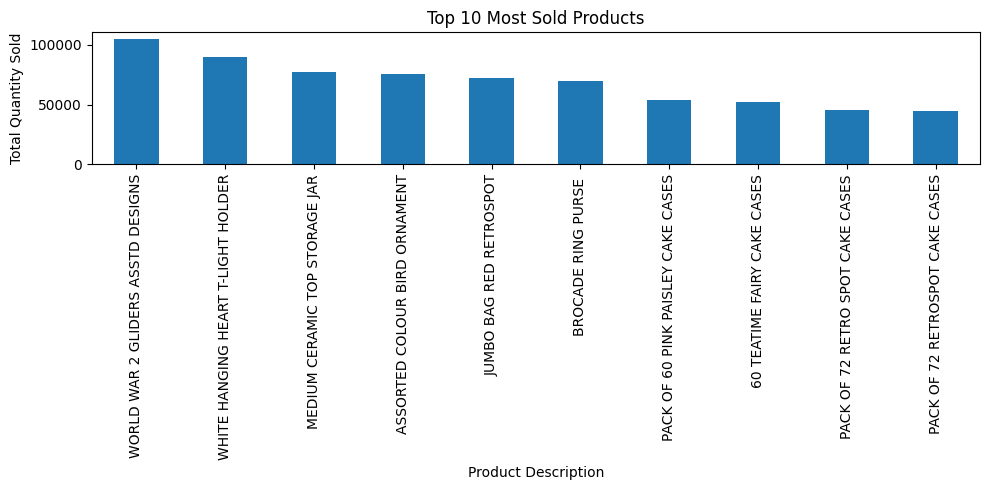

In [8]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Most Sold Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


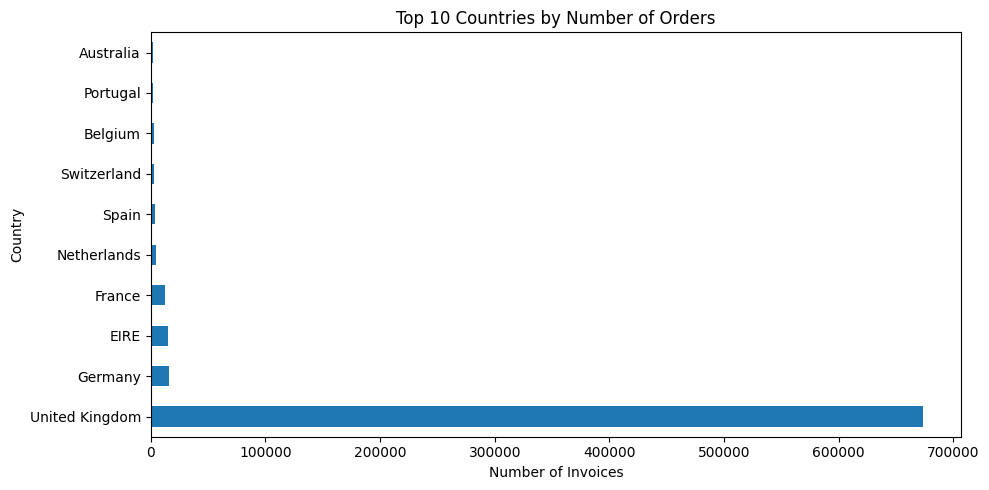

In [9]:
sales_by_country = df.groupby('Country')['Invoice'].count().sort_values(ascending=False).head(10)
sales_by_country.plot(kind='barh', figsize=(10,5), title='Top 10 Countries by Number of Orders')
plt.xlabel('Number of Invoices')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


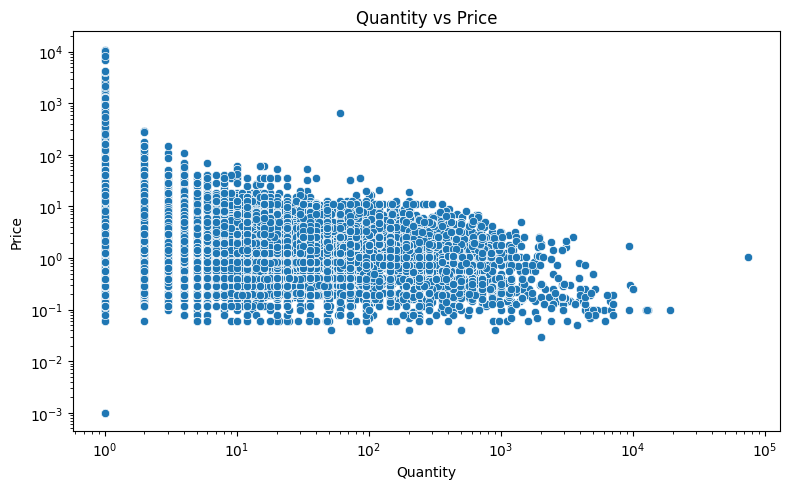

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='Price', data=df)
plt.title('Quantity vs Price')
plt.xscale('log')  # use log scale to handle large quantity range
plt.yscale('log')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
df_scaled = df[['Quantity', 'Price']].copy()

# Apply Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Quantity_Scaled', 'Price_Scaled'])


In [12]:
df = df.reset_index(drop=True)
df_scaled_final = pd.concat([df, scaled_df], axis=1)
df_scaled_final.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_Scaled,Price_Scaled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,-0.012160,0.123583
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,-0.012160,0.116931
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,-0.012160,0.116931
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,0.299262,-0.037730
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,0.091648,-0.066001


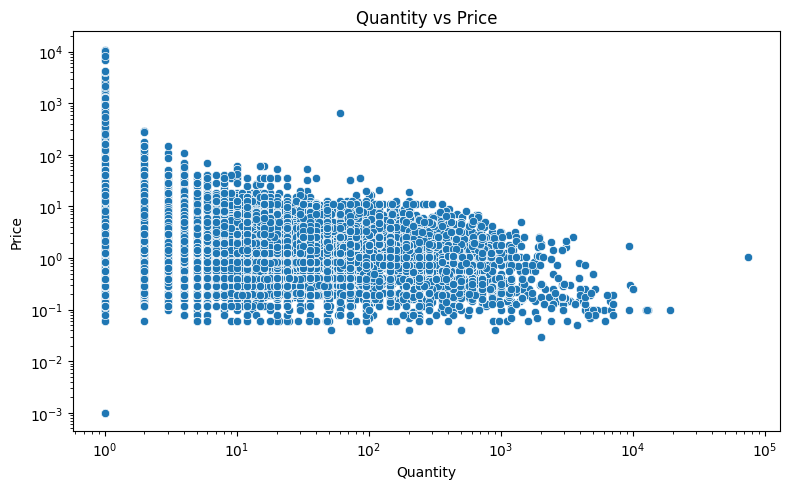

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='Price', data=df)
plt.title('Quantity vs Price')
plt.xscale('log')  # use log scale to handle large quantity range
plt.yscale('log')
plt.tight_layout()
plt.show()


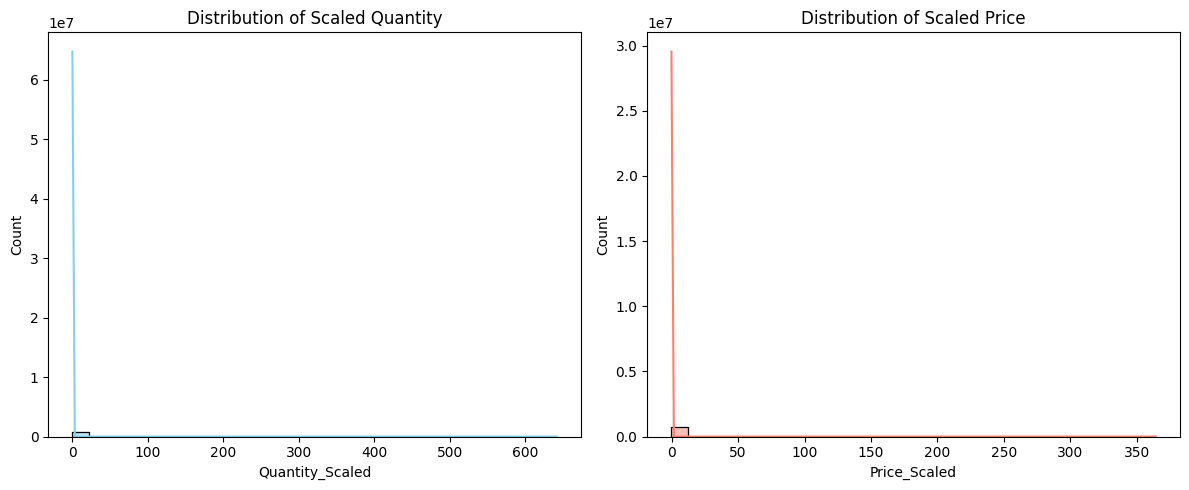

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_scaled_final['Quantity_Scaled'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Scaled Quantity')

plt.subplot(1, 2, 2)
sns.histplot(df_scaled_final['Price_Scaled'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Scaled Price')

plt.tight_layout()
plt.show()


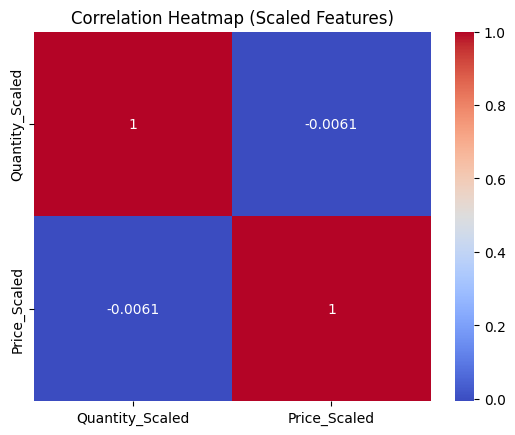

In [15]:
corr = df_scaled_final[['Quantity_Scaled', 'Price_Scaled']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Scaled Features)")
plt.show()


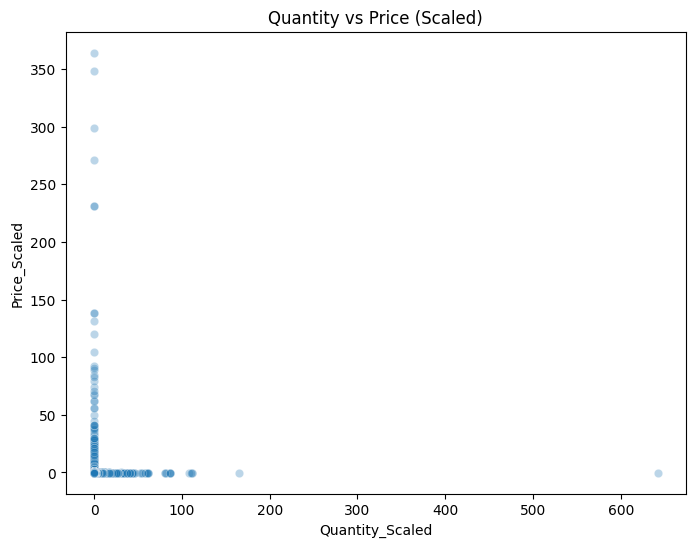

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity_Scaled', y='Price_Scaled', data=df_scaled_final, alpha=0.3)
plt.title('Quantity vs Price (Scaled)')
plt.show()


In [17]:
from sklearn.cluster import KMeans

X_cluster = df_scaled_final[['Quantity_Scaled', 'Price_Scaled']]


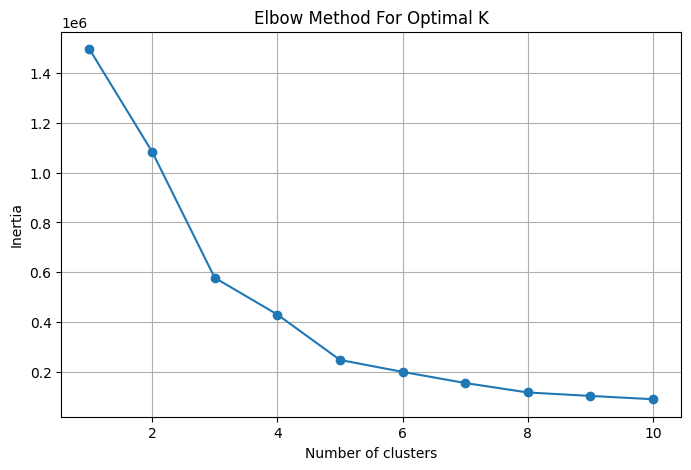

In [18]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_scaled_final['Cluster'] = kmeans.fit_predict(X_cluster)


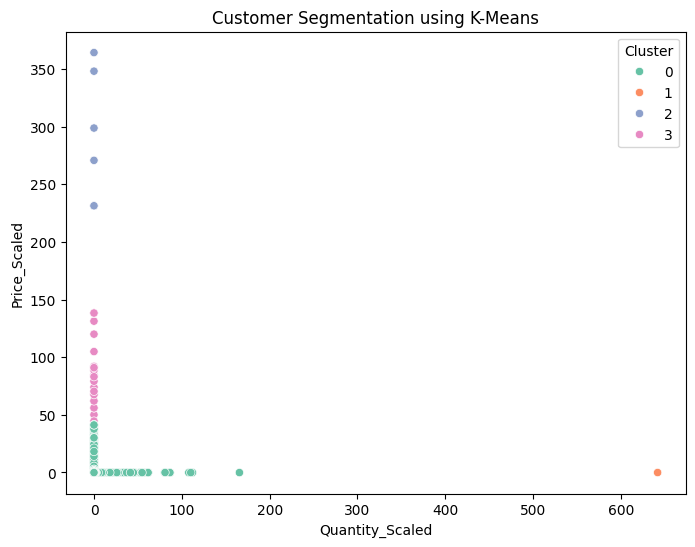

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_scaled_final, x='Quantity_Scaled', y='Price_Scaled', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation using K-Means')
plt.show()


In [21]:
cluster_summary = df_scaled_final.groupby('Cluster')[['Quantity', 'Price']].mean()
print(cluster_summary)


             Quantity        Price
Cluster                           
0           13.306939     3.093533
1        74215.000000     1.040000
2            1.000000  8744.498333
3            1.000000  2525.406190


In [22]:
df_scaled_final['Anomaly'] = ((df_scaled_final['Quantity'] > 1000) | (df_scaled_final['Price'] > 100)).astype(int)
df_scaled_final['Anomaly'].value_counts()  # 0 = normal, 1 = anomaly


,count
Anomaly,
0,747800
1,644


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode 'Country'
le = LabelEncoder()
df_scaled_final['Country_Code'] = le.fit_transform(df_scaled_final['Country'])

# Features and Target
features = ['Quantity', 'Price', 'Country_Code']
X = df_scaled_final[features]
y = df_scaled_final['Anomaly']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[149556      0]
 [     0    133]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149556
           1       1.00      1.00      1.00       133

    accuracy                           1.00    149689
   macro avg       1.00      1.00      1.00    149689
weighted avg       1.00      1.00      1.00    149689



In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = df_scaled_final[['Price', 'Country_Code']]
y = df_scaled_final['Quantity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [28]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 14.205629389021647
MSE: 44095.66126940293
R² Score: 0.0002643643364075299


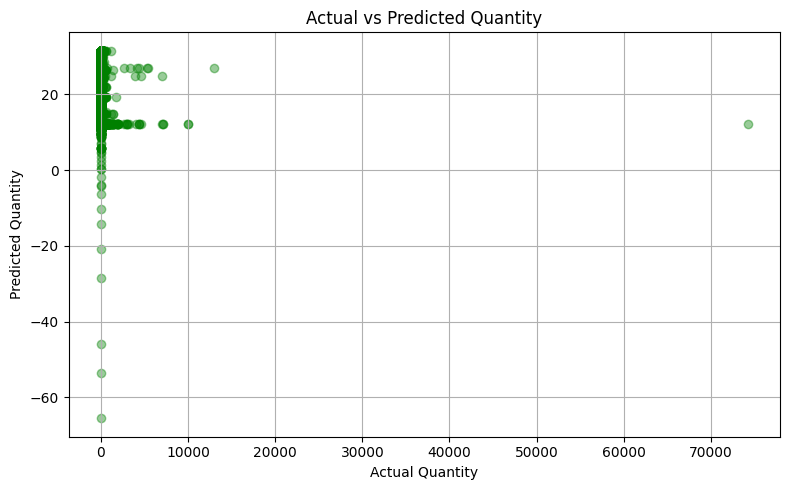

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs Predicted Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Features
X = df_scaled_final[['Quantity', 'Price', 'Country_Code']]
y = df_scaled_final['Anomaly']

# Train-test split already done earlier
# X_train, X_test, y_train, y_test


In [31]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)


In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Confusion Matrix:
[[8231 3830   17 ...    0    0    0]
 [4974 5557   65 ...    0    0    0]
 [3858  642  378 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.29      0.28     27963
           2       0.41      0.25      0.32     21802
           3       0.40      0.04      0.07     10377
           4       0.29      0.25      0.27     11389
           5       0.00      0.00      0.00      3192
           6       0.32      0.43      0.37     15169
           7       0.00      0.00      0.00       478
           8       0.18      0.09      0.12      4430
           9       0.00      0.00      0.00       537
          10       0.36      0.12      0.19      7382
          11       0.00      0.00      0.00       131
          12       0.26      0.72      0.39     22358
          13       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Use previously defined features and labels
X = df_scaled_final[['Quantity', 'Price', 'Country_Code']]
y = df_scaled_final['Anomaly']

# Already split into X_train, X_test, y_train, y_test


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
knn_pred = knn.predict(X_test)


In [35]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

print("\nClassification Report:")
print(classification_report(y_test, knn_pred))


Confusion Matrix:
[[10734  6301  1292 ...     0     0     0]
 [ 7987  5541  1097 ...     0     0     0]
 [ 2898  2513  1285 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.38      0.30     27963
           2       0.20      0.25      0.22     21802
           3       0.21      0.12      0.16     10377
           4       0.30      0.06      0.10     11389
           5       0.15      0.00      0.01      3192
           6       0.32      0.19      0.24     15169
           7       0.00      0.00      0.00       478
           8       0.19      0.03      0.05      4430
           9       0.00      0.00      0.00       537
          10       0.17      0.30      0.21      7382
          11       0.00      0.00      0.00       131
          12       0.30      0.49      0.37  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_